# USDA Food Database

*The US Department of Agriculture (USDA) makes available a database of food nutrient information. Programmer Ashley Williams created a version of this database in JSON format.*

### Imports

In [2]:
from collections import defaultdict, Counter
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
db = json.load(open("datasets/usda_food/database.json"))
len(db)

6636

In [4]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [6]:
nutrients = pd.DataFrame(db[0]["nutrients"])

nutrients.head(7)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [7]:
info_keys = ["description", "group", "id", "manufacturer"]

info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [8]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [10]:
# You can see the distribution of food groups with value_counts

pd.value_counts(info["group"])[:10]

group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: count, dtype: int64

In [19]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [20]:
nutrients.duplicated().sum() # number of duplicates

14179

In [21]:
nutrients = nutrients.drop_duplicates()

*Since `"group"` and `"description"` are in both DataFrame objects, we can rename for clarity*

In [22]:
col_mapping = {"description": "food", "group": "fgroup"}

info = info.rename(columns=col_mapping, copy=False)

info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [25]:
col_mapping = {"description": "nutrient", "group": "nutgroup"}

nutrients = nutrients.rename(columns=col_mapping, copy=False)

nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [26]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [27]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

<Axes: title={'center': 'Median Zinc Values by Food Group'}, ylabel='fgroup'>

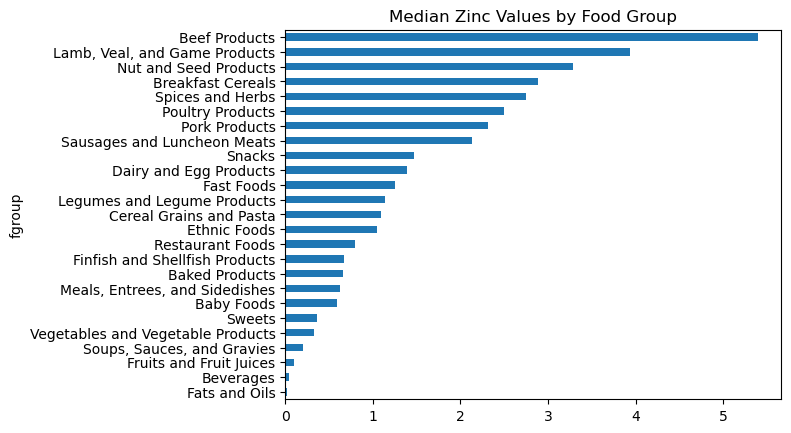

In [33]:
result = ndata.groupby(["nutrient","fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh", title='Median Zinc Values by Food Group')

*Using the `idxmax` or `argmax` Series methods, you can find which food is most dense in each nutrient.*

In [40]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

max_foods.loc["Amino Acids"]


,value,food
nutrient,,
Alanine,8.009,"Gelatins, dry powder, unsweetened"
Arginine,7.436,"Seeds, sesame flour, low-fat"
Aspartic acid,10.203,Soy protein isolate
Cystine,1.307,"Seeds, cottonseed flour, low fat (glandless)"
Glutamic acid,17.452,Soy protein isolate
Glycine,19.049,"Gelatins, dry powder, unsweetened"
Histidine,2.999,"Whale, beluga, meat, dried (Alaska Native)"
Hydroxyproline,0.803,"KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA..."
Isoleucine,4.300,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE..."
